### 校正图像畸变

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import ad_lane.ad_lane_lines as al

In [2]:
file_para = open( 'calibration_parameters.pkl', 'rb' )
dist_pickle = pickle.load( file_para )
mtx = dist_pickle['mtx']
dist = dist_pickle['dist']
file_para.close()

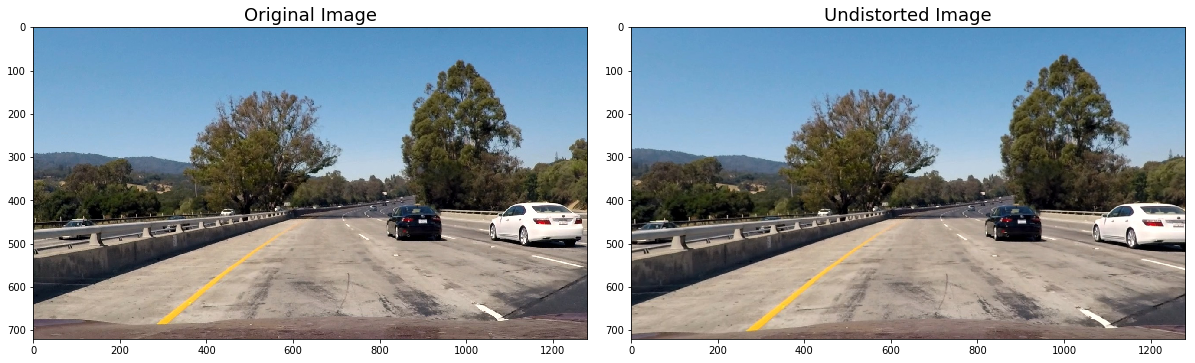

In [3]:
origin_img = mpimg.imread('test_images/test1.jpg')

test_img = al.cal_undistorted(origin_img, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
f.tight_layout()
ax1.imshow(origin_img)
ax1.set_title('Original Image', fontsize=18)
ax2.imshow(test_img)
ax2.set_title('Undistorted Image', fontsize=18)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### 图像透视

In [4]:
file_para = open( 'perspective_parameters.pkl', 'rb' )
dist_pickle = pickle.load( file_para )
M = dist_pickle['M']
M_back = dist_pickle['M_back']
file_para.close()

In [5]:
img_size = (test_img.shape[1], test_img.shape[0])  # 先是宽度，再是高度
wrap_img= cv2.warpPerspective(test_img, M, img_size)

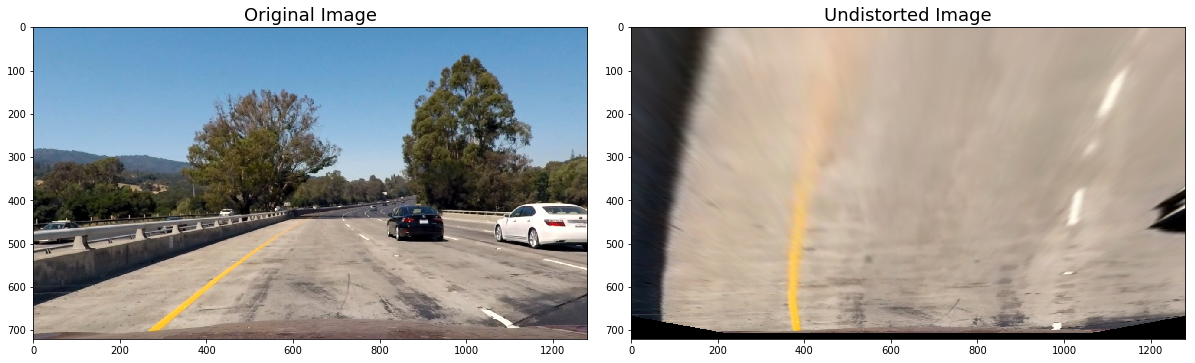

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
f.tight_layout()
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=18)
ax2.imshow(wrap_img)
ax2.set_title('Undistorted Image', fontsize=18)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### 颜色甄别车道

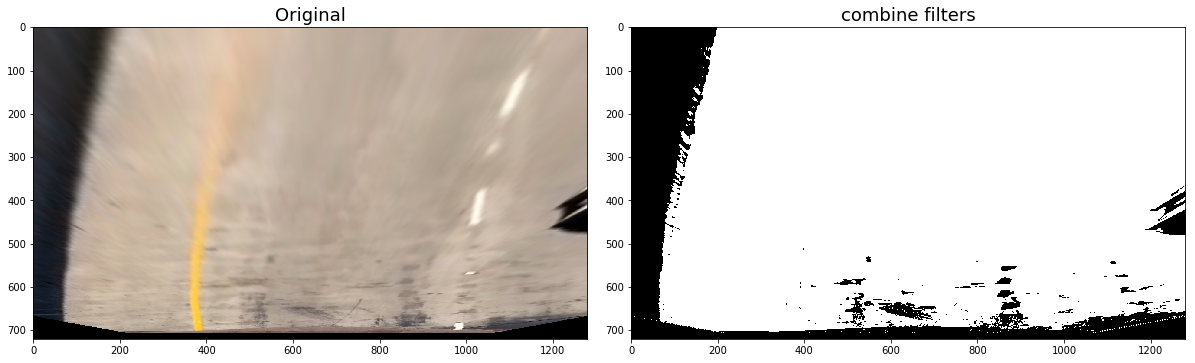

In [7]:
binary = al.combine_filters(wrap_img)

f, axs = plt.subplots(1, 2, figsize=(16, 9))
f.tight_layout()
axs[0].imshow(wrap_img)
axs[0].set_title('Original', fontsize=18)
axs[1].imshow(binary, cmap='gray')
axs[1].set_title('combine filters', fontsize=18)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

### 车道线识别

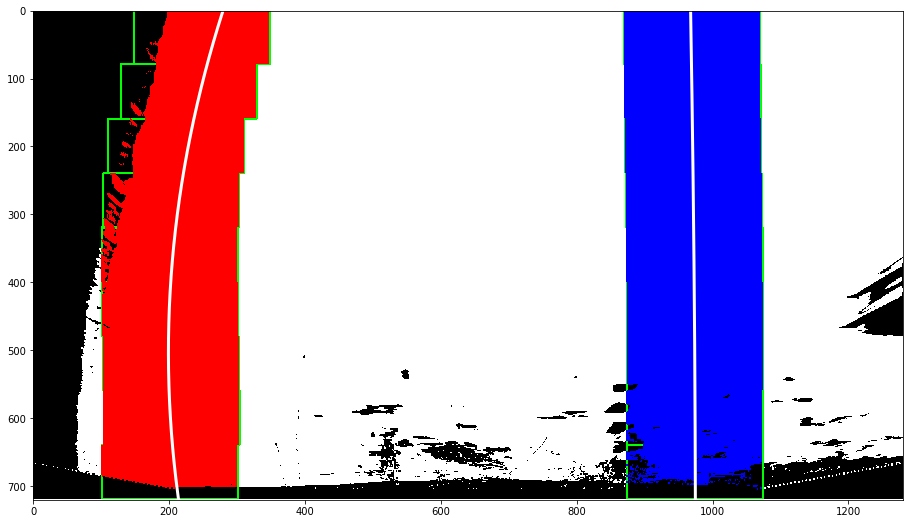

In [8]:
left_fit, right_fit, out_img = al.find_line_fit(binary)
left_fitx, right_fitx, ploty = al.get_fit_xy(binary, left_fit, right_fit)

fig = plt.figure(figsize=(16, 9))
plt.imshow(out_img)
#绘制左侧车道线的方程
plt.plot(left_fitx, ploty, color='white', linewidth=3.0)
#绘制右侧车道线的方程
plt.plot(right_fitx, ploty, color='white',  linewidth=3.0)
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

In [9]:
curvature, distance_from_center = al.cal_cur_and_pos(binary, left_fitx, right_fitx, ploty)

In [10]:
curvature

7915.891815197068

In [11]:
distance_from_center

-0.22212758652011422

### 合成图片

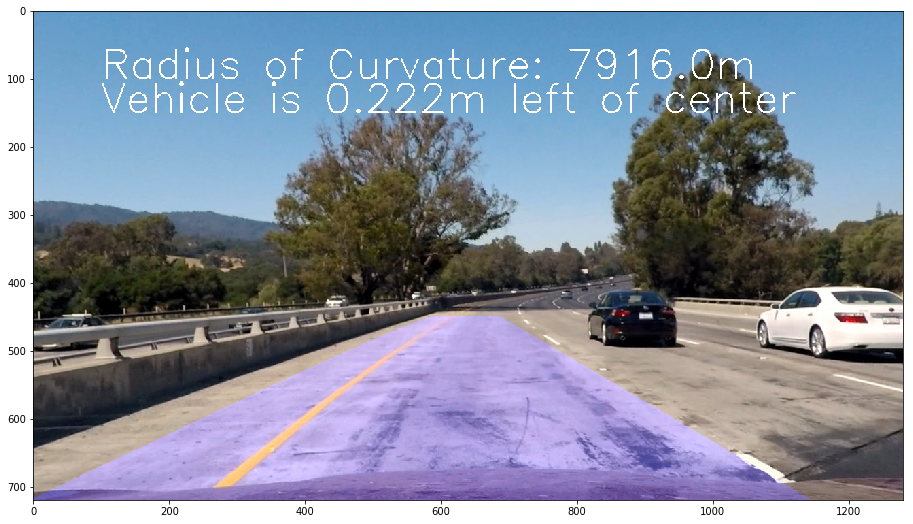

In [12]:
result = al.image_add(binary, test_img, left_fitx, right_fitx, ploty, M_back)
result = al.draw_values(result, curvature, distance_from_center)
fig = plt.figure(figsize=(16, 9))
plt.imshow(result)

### 用隧道函数